In [57]:
from collections import OrderedDict

import numpy as np
import torch
from torch import nn, optim

from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *
from ignite.utils import *
import tqdm

# create default evaluator for doctests

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

# create default optimizer for doctests

param_tensor = torch.zeros([1], requires_grad=True)
default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# create default trainer for doctests
# as handlers could be attached to the trainer,
# each test must define his own trainer using `.. testsetup:`

def get_default_trainer():

    def train_step(engine, batch):
        return batch

    return Engine(train_step)

# create default model for doctests

default_model = nn.Sequential(OrderedDict([
    ('base', nn.Linear(4, 2)),
    ('fc', nn.Linear(2, 1))
]))

# manual_seed(666)

for i in tqdm.tqdm(range(1000)):
    metric = FID(num_features=1, feature_extractor=default_model)
    metric.attach(default_evaluator, "fid")
    y_true = torch.randn(10, 4)
    y_pred = torch.randn(10, 4)
    # print(y_true, y_pred)
    state = default_evaluator.run([[y_true, y_pred]])
    s1 = state.metrics["fid"]
    state = default_evaluator.run([[y_pred, y_true]])
    s2 = state.metrics["fid"]
    assert np.abs(s1 - s2) < 1e-5, s1, s2

In [2]:
from diffusers import AutoencoderKL
model = AutoencoderKL.from_pretrained('CompVis/stable-diffusion-v1-4', subfolder='vae')

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-1.) tensor(1.)


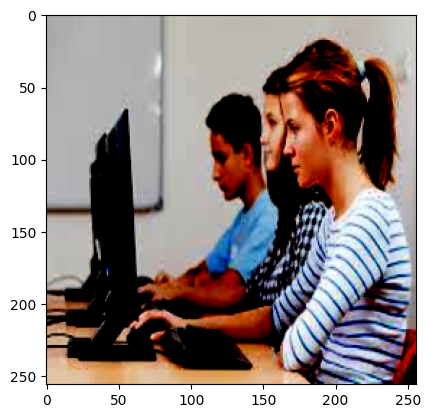

torch.Size([1, 3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 256, 256]) tensor(-1.0797) tensor(1.0468)
torch.Size([1, 3, 256, 256]) tensor(-1.0797) tensor(1.0468)


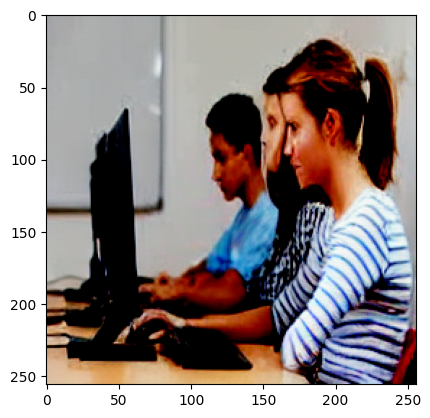

In [32]:
import PIL 
import torch
from PIL import Image 
image = Image.open('/home/ataraxia/Datasets/documents/tobacco3482/huggingface/downloads/extracted/tobacco3482.tar.gz/ADVE/502472939.jpg')
image = Image.open('/home/ataraxia/Downloads/images.jpeg')

from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
])
image = transform(image)
image = image.unsqueeze(0)
# image = image.repeat(1, 3, 1, 1)
print(image.min(), image.max())

import matplotlib.pyplot as plt
plt.imshow(image[0].permute(1,2,0))
plt.show()
with torch.no_grad():
    print(image.shape)
    output = model(image).sample
    print(output.shape, output.min(), output.max())
    # output = (output / 2 + 0.5).clamp(0, 1)

    print(output.shape, output.min(), output.max())
    import matplotlib.pyplot as plt
    plt.imshow(output[0].permute(1,2,0))
    plt.show()